In [1]:
from src.agents.data_agent.agent import *

Status:  Initialising nodes
Status:  Initialising ChatOpenAI
Status:  ChatOpenAI initialised


In [2]:
query = "avg session length per user"

In [3]:
#data, query_code = get_data_from_db(query)

In [4]:
data = fetch_metric_data('1')

In [5]:
data

,Day,Minutes
0,2025-01-07,226.38834951456310679822
1,2025-01-08,141.59155405405405405428
2,2025-01-09,12.44790076335877862417
3,2025-01-10,11.15574572127139364254
4,2025-01-11,10.73907779495105615636
5,2025-01-12,15.18227785959744722788
6,2025-01-13,29.76347941567065073108
7,2025-01-14,12.94475655430711610768
8,2025-01-15,9.70523049645390070922


In [6]:
import matplotlib.pyplot as plt
import io
import base64

In [13]:
def get_base64_plot(plot_type, x, y=None, labels=None, categories=None):
    # Create the plot based on the specified type
    plt.figure()
    if plot_type == 'line':
        plt.plot(x, y)
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    elif plot_type == 'bar':
        plt.bar(x, y)
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])
    elif plot_type == 'pie':
        if labels:
            plt.pie(x, labels=categories, autopct='%1.1f%%')
        else:
            plt.pie(x, autopct='%1.1f%%')
    else:
        raise ValueError("Unsupported plot type. Use 'line', 'bar', or 'pie'.")

    # Save the plot to a buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)

    # Encode the buffer content to Base64
    base64_string = base64.b64encode(buf.read()).decode('utf-8')
    buf.close()

    plt.show()

    # Close the plot to free memory
    plt.close()

    return base64_string
"""
# Example usage:
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 35]
labels = ['A', 'B', 'C', 'D', 'E']

# Get base64 for different plots
line_plot_base64 = get_base64_plot('line', x, y)
bar_plot_base64 = get_base64_plot('bar', x, y)
pie_plot_base64 = get_base64_plot('pie', x, labels=labels)

# The Base64 string can now be used in HTML or other purposes
print(line_plot_base64)"""


"\n# Example usage:\nx = [1, 2, 3, 4, 5]\ny = [10, 20, 25, 30, 35]\nlabels = ['A', 'B', 'C', 'D', 'E']\n\n# Get base64 for different plots\nline_plot_base64 = get_base64_plot('line', x, y)\nbar_plot_base64 = get_base64_plot('bar', x, y)\npie_plot_base64 = get_base64_plot('pie', x, labels=labels)\n\n# The Base64 string can now be used in HTML or other purposes\nprint(line_plot_base64)"

In [8]:
x = data[data.columns[0]]
y = data[data.columns[1]]

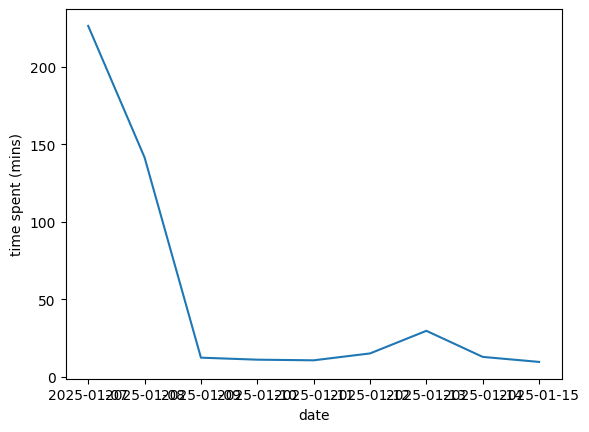

In [16]:
line_plot_base64 = get_base64_plot('line', x, y, labels=['date', 'time spent (mins)'])

In [11]:
line_plot_base64

'iVBORw0KGgoAAAANSUhEUgAAAjkAAAGdCAYAAADwjmIIAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAANuNJREFUeJzt3Ql8VOXZ9/EreyCQhCRkAcK+L1LKLquK4oYbtXVXSrW1+rRK1ZbW2mqfvrbqW/tYt9pW0UdQ6+POo/algICsArIqGNaENSSQnezzfq47zDAJ2TOTM+fM7/v5HDKZOZm5b84s/7nPfZ0T4nK5XAIAAOAwoVY3AAAAwB8IOQAAwJEIOQAAwJEIOQAAwJEIOQAAwJEIOQAAwJEIOQAAwJEIOQAAwJHCxYaqq6vlyJEj0rlzZwkJCbG6OQAAoBn0+MOFhYXSrVs3CQ31/ziLLUOOBpz09HSrmwEAAFohKytLevToIf5my5CjIzju/6TY2FirmwMAAJqhoKDADFK4P8f9zZYhx72LSgMOIQcAAHsJaaepJkw8BgAAjkTIAQAAjkTIAQAAjkTIAQAAjkTIAQAAjkTIAQAAjkTIAQAAjkTIAQAAjkTIAQAAjkTIAQAAjkTIAQAAjkTIAQAAjkTI8ZJxvFDmv7td/nfbUaubAgAA2oiQ4+XTHcfkjQ2Z8tKqfVY3BQAAtBEhx8uN43tKZFiobM3Kky8zT1ndHAAA0AaEHC9JnaLkypFp5vKCNQesbg4AAGgDQk4dc87vY35+vP2oZBeUWt0cAADQSoScOkb0iJPRvbpIRZVLFq7PtLo5AACglQg59bjj/N7mp4acssoqq5sDAABagZBTj0uHp0pKbJTkFJWZ3VYAAMB+CDn1iAgLlVvG9zKXF6w5aHVzAABAKxByGkA5OQAA9kbIaaScfNbIbuYy5eQAANgPIacZE5D1NA+UkwMAYC+EnGaUk1dWU04OAIDdEHKaQDk5AAD2RMhpAuXkAAD